In [1]:
# %load prepareStats.py
import pandas as pd
import matplotlib
import os

unknownResult = ["nan0n", "NaN", "NA", "inf"]
crashes = ["Accident", "Collision", "Fatal accident", "Collision damage", "Spun off"]
Europe = ["Austrian", "Belgian", "British", "Czech", "Danish", "Dutch", "East German", "Finnish", "French", "German", "Hungarian", "Irish", "Italian", "Liechtensteiner", "Monegasque", "Polish", "Portuguese", "Russian", "Spanish", "Swedish", "Swiss"]
NAmerica = ["American", "Canadian", "Mexican"]
SAmerica = ["Argentine", "Brazilian", "Chilean", "Colombian", "Uruguayan", "Venezuelan"]
Asia = ["Chinese", "Indian", "Indonesian", "Japanese", "Malaysian", "Thai", "Hong Kong"]
Africa = ["Rhodesian", "South African"]
Oceania = ["Australian", "New Zealander"]
multiple = ["American-Italian", "Argentine-Italian"]

drivers = pd.read_csv(os.path.join("data", "drivers.csv"))
results = pd.read_csv(os.path.join("data", "results.csv"))
races = pd.read_csv(os.path.join("data", "races.csv"))
circuits = pd.read_csv(os.path.join("data", "circuits.csv"))
status = pd.read_csv(os.path.join("data", "status.csv"))
constructors = pd.read_csv(os.path.join("data", "constructors.csv"))

results = results.merge(drivers, on="driverId", how="right")
races = races.merge(circuits, on="circuitId", how="right")
results = results.merge(races, on="raceId", how="right")
results = results.merge(status, on="statusId", how="right")
results = results.merge(constructors, on="constructorId", how="right")

results["fullname"] = results["forename"] + " " + results["surname"]
results["date"] = results["date"].str.slice(0,6) + results["year"].astype(str).str.slice(0,4)
results["date"] = pd.to_datetime(results["date"], format="%d/%m/%Y")
results["year"] = results["year"].astype(float)
results["round"] = results["round"].astype(float)
results["position"] = results["position"].apply(pd.to_numeric, errors = "coerce").dropna().astype(float)
results["year_round"] = results["year"].astype(str).str.slice(0,4) + results["round"].astype(str).str.slice(0,-2).str.zfill(2)
results = results[~results.year_round.isin(unknownResult)]
results["year_round"] = results["year_round"].apply(pd.to_numeric, errors = "coerce").dropna().astype(int)

results.loc[results.nationality_x.isin(Europe),"driverContinent"]="Europe"
results.loc[results.nationality_x.isin(NAmerica),"driverContinent"]="NAmerica"
results.loc[results.nationality_x.isin(SAmerica),"driverContinent"]="SAmerica"
results.loc[results.nationality_x.isin(Asia),"driverContinent"]="Asia"
results.loc[results.nationality_x.isin(Africa),"driverContinent"]="Africa"
results.loc[results.nationality_x.isin(Oceania),"driverContinent"]="Oceania"
results.loc[results.nationality_x.isin(multiple),"driverContinent"]="multiple"

wins = results[results["position"] == 1]
podiums = results[results["position"] < 4]
top6 = results[results["position"] < 7]

C:\Users\micha\AppData\Local\Temp\ipykernel_13884\3539717499.py:27: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  results = results.merge(constructors, on="constructorId", how="right")


In [2]:
pd.set_option('display.max_rows', results.shape[0]+1)

In [3]:
pd.set_option('display.max_columns', results.shape[0]+1)

## Individual drivers achieving a win, podium or top 6 finish in a given season

In [4]:
winningDrivers = wins.groupby(["year"]).nunique()["fullname"].transpose()

<AxesSubplot:xlabel='year'>

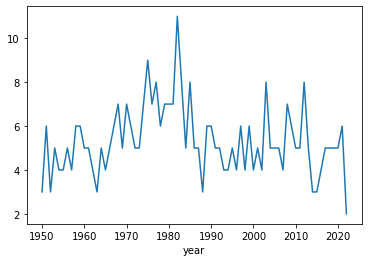

In [5]:
winningDrivers.plot()

In [6]:
podiumDrivers = podiums.groupby(["year"]).nunique()["fullname"].transpose()

<AxesSubplot:xlabel='year'>

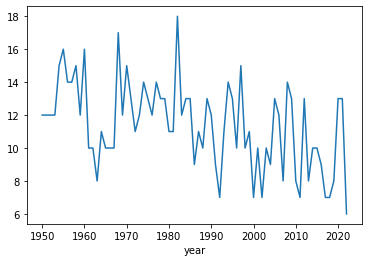

In [7]:
podiumDrivers.plot()

In [8]:
top6drivers = top6.groupby(["year"]).nunique()["fullname"].transpose()

<AxesSubplot:xlabel='year'>

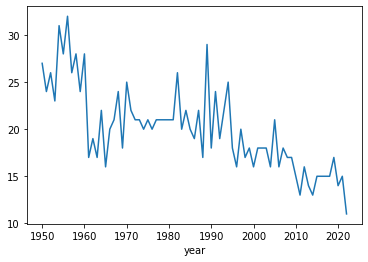

In [9]:
top6drivers.plot()

## Different constructors achieving a win, podium or top 6 finish in a given season

In [10]:
winningConstructors = wins.groupby(["year"]).nunique()["name"].transpose()

<AxesSubplot:xlabel='year'>

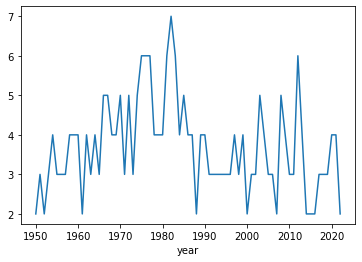

In [11]:
winningConstructors.plot()

In [12]:
podiumConstructors = podiums.groupby(["year"]).nunique()["name"].transpose()

<AxesSubplot:xlabel='year'>

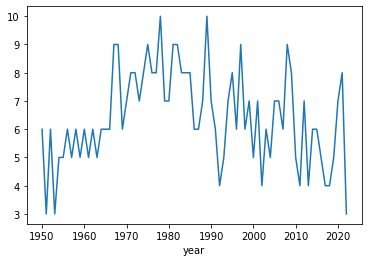

In [13]:
podiumConstructors.plot()

## Drivers' countries and continents of origin

In [14]:
driverNationalities = results.groupby(["year"]).nunique()["nationality_x"].transpose()

<AxesSubplot:xlabel='year'>

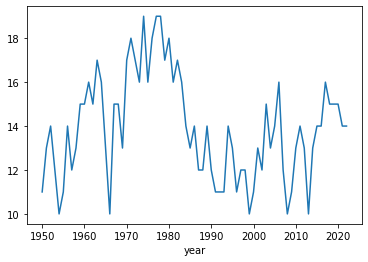

In [15]:
driverNationalities.plot()

In [16]:
winNationality = wins.groupby(["year"]).nunique()["nationality_x"].transpose()

<AxesSubplot:xlabel='year'>

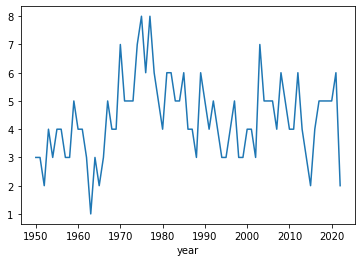

In [17]:
winNationality.plot()

In [18]:
top6teamsNationality = top6.groupby(["year"]).nunique()["nationality_y"].transpose()

<AxesSubplot:xlabel='year'>

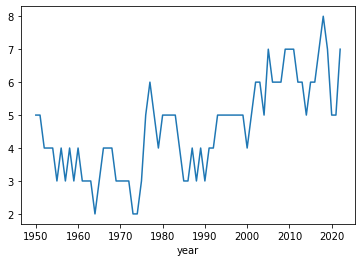

In [19]:
top6teamsNationality.plot()

In [20]:
driverContinents = results.groupby(["year"]).nunique()["driverContinent"].transpose()

<AxesSubplot:xlabel='year'>

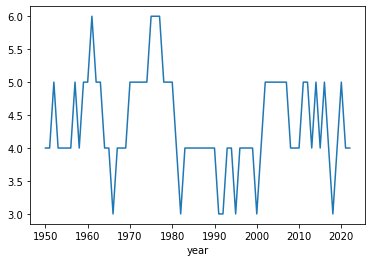

In [21]:
driverContinents.plot()

In [22]:
driverPodiumContinents = podiums.groupby(["year"]).nunique()["driverContinent"].transpose()

<AxesSubplot:xlabel='year'>

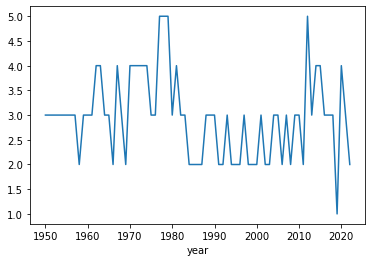

In [23]:
driverPodiumContinents.plot()

2019 Formula One World Championship? More like 2019 Formula One European Championship!

In [24]:
driverWinsContinents = wins.groupby(["year"]).nunique()["driverContinent"].transpose()

<AxesSubplot:xlabel='year'>

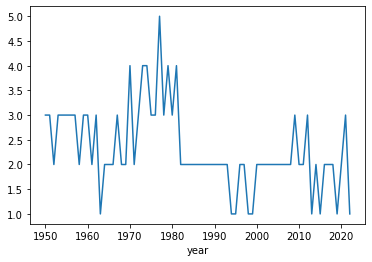

In [25]:
driverWinsContinents.plot()

However, 2019 wasn't the first season with only European drivers winning.

In [26]:
europeanWinsRatio = wins[wins["driverContinent"] == "Europe"].groupby(["year"]).nunique()["raceId"].transpose() / wins.groupby(["year"]).nunique()["raceId"].transpose()

<AxesSubplot:xlabel='year'>

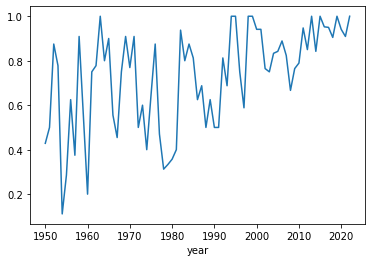

In [27]:
europeanWinsRatio.plot()

In [28]:
europeanPodiumRatio = podiums[podiums["driverContinent"] == "Europe"].groupby(["year"])["raceId"].count() / podiums.groupby(["year"])["raceId"].count()

<AxesSubplot:xlabel='year'>

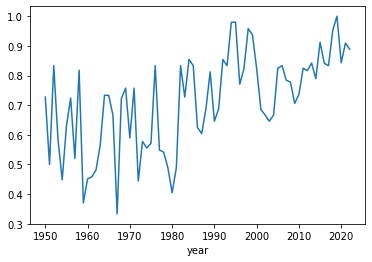

In [29]:
europeanPodiumRatio.plot()